In [86]:
import array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
array.array('i', [1, 2, 3])

array('i', [1, 2, 3])

In [8]:
cols = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
dt_churn = pd.read_csv('C:\\Users\sonay\Downloads\Churn_Modelling.csv', usecols=cols)
dt_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


([<matplotlib.axis.YTick at 0x19dae09f250>,
 [Text(0, 0, '0'),
  Text(0, 1000, '1000'),
  Text(0, 2000, '2000'),
  Text(0, 3000, '3000'),
  Text(0, 4000, '4000'),
  Text(0, 5000, '5000'),
  Text(0, 6000, '6000')])

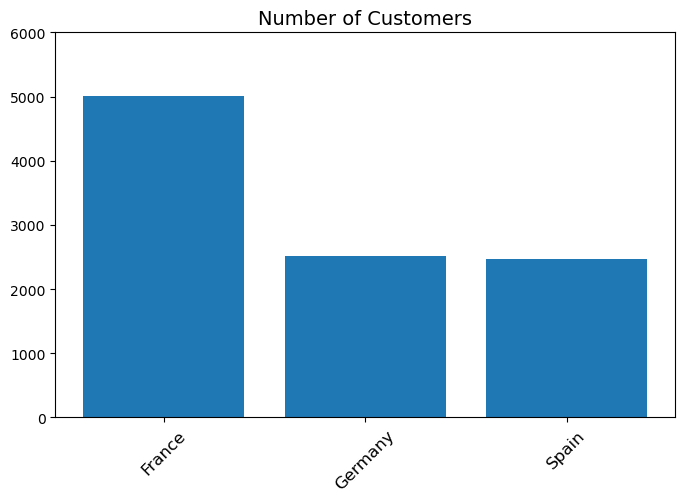

In [32]:
plt.figure(figsize=(8,5))
plt.title('Number of Customers', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.bar(dt_churn.Geography.value_counts().index, height = dt_churn.Geography.value_counts().values)
plt.yticks(ticks=np.arange(0, 7000, 1000))

In [26]:
dt_churn.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [51]:
dt_churn.Balance.value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

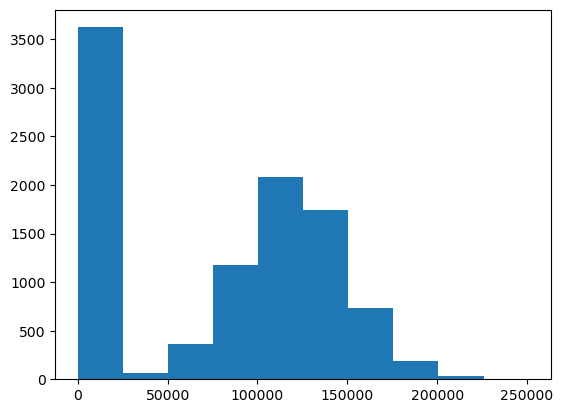

In [52]:
plt.hist(dt_churn.Balance)

Text(0.5, 1.0, 'Distribution on Balance 25000 - 225000')

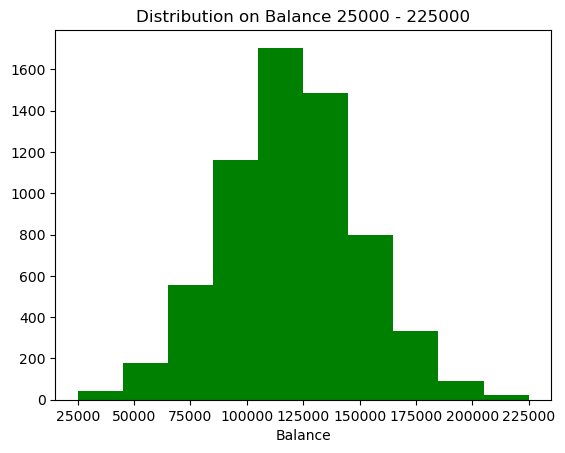

In [57]:
plt.hist(dt_churn.Balance, range=(25000, 225000), color='g')
plt.xlabel('Balance')
plt.title('Distribution on Balance 25000 - 225000')

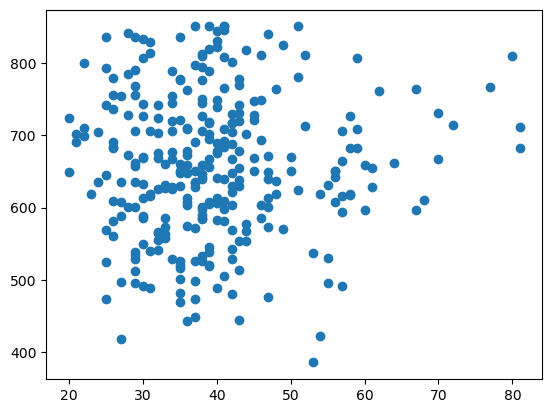

In [65]:
sample = dt_churn.sample(n=300)
plt.scatter(sample.Age,sample.CreditScore)

In [79]:
plt.figure(figsize=(8,5))


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [75]:
data = pd.read_csv("C:\\Users\sonay\Downloads\project data.csv")
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


,online_order
listed_in(type),
Buffet,7
Cafes,23
Dining,110
other,8


In [11]:
def func_split(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)

data['rate'] = data['rate'].apply(func_split)                            
                             
data.head()                             

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [125]:
data_group = data.groupby('listed_in(type)').agg({'online_order':'count'})
data_group

,online_order
listed_in(type),
Buffet,7
Cafes,23
Dining,110
other,8


In [27]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [40]:
data.loc[data['votes']==4884]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
38,Empire Restaurant,Yes,No,4.4,4884,750,other


In [45]:
max_votes = data['votes'].max()
restaurant_with_max_votes = data.loc[data['votes'] == max_votes, ('name', 'rate')]
 
print("Restaurant(s) with the maximum votes:")
print(max_votes)
restaurant_with_max_votes

Restaurant(s) with the maximum votes:
4884


,name,rate
38,Empire Restaurant,4.4


<Axes: xlabel='listed_in(type)', ylabel='count'>

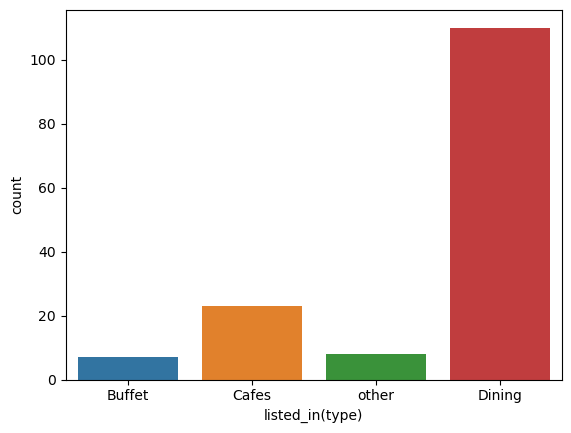

In [26]:
sns.countplot(x = data['listed_in(type)'])


Text(0, 0.5, 'votes')

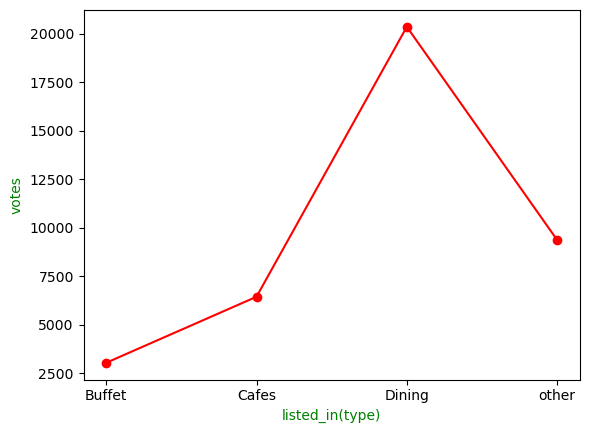

In [59]:
a = data.groupby('listed_in(type)')['votes'].sum()
plt.plot(pd.DataFrame({'votes':a}), c='red', marker='o')
plt.xlabel('listed_in(type)', c='green')
plt.ylabel('votes', c='green')

In [64]:
data.groupby(data['online_order'])['rate'].sum()

online_order
No     313.9
Yes    223.8
Name: rate, dtype: float64

<Axes: xlabel='online_order', ylabel='rate'>

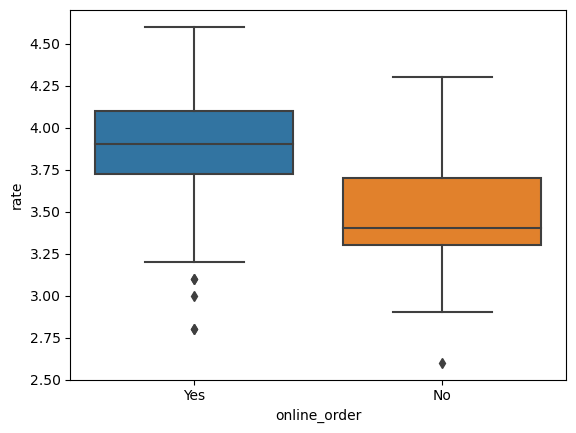

In [65]:
sns.boxplot(x='online_order', y='rate', data=data)

In [108]:
slovar = {'price':[10, 14, 56,  39], 'count':[2, 3, 1, 5]}

In [109]:
dt = pd.DataFrame(data = slovar)
dt

,price,count
0,10,2
1,14,3
2,56,1
3,39,5


In [110]:
dt.price.nunique()

4

In [123]:
dt[dt.price>10]['count']

1    3
2    1
3    5
Name: count, dtype: int64

In [120]:
dt.loc[dt.price>10, ['count']]

,count
1,3
2,1
3,5
